In [1]:
import pandas as pd
from scipy.stats import norm

from ab_testing.testers import SampleTester
from ab_testing.utils import plot

In [2]:
df = pd.DataFrame({
    'ab_group_artwork': [
        'control_1',
        'control_2',
        'test_1',
        'test_2',
    ],
    'observation': [
        1_683_213,
        1_694_398,
        1_689_317,
        3_371_556,
    ],
    'success': [
        2559,
        2874,
        3003,
        6246,
        # 6200,
    ],
})

df[['group', 'product']] = df['ab_group_artwork'].str.split('_', n=1, expand=True)
df = (df
    .drop('ab_group_artwork', axis=1)
    .set_index(['product', 'group'])
    .sort_index()
)
df

observation  success
product group                        
1       control      1683213     2559
        test         1689317     3003
2       control      1694398     2874
        test         3371556     6246

# Null hypothesis rejection

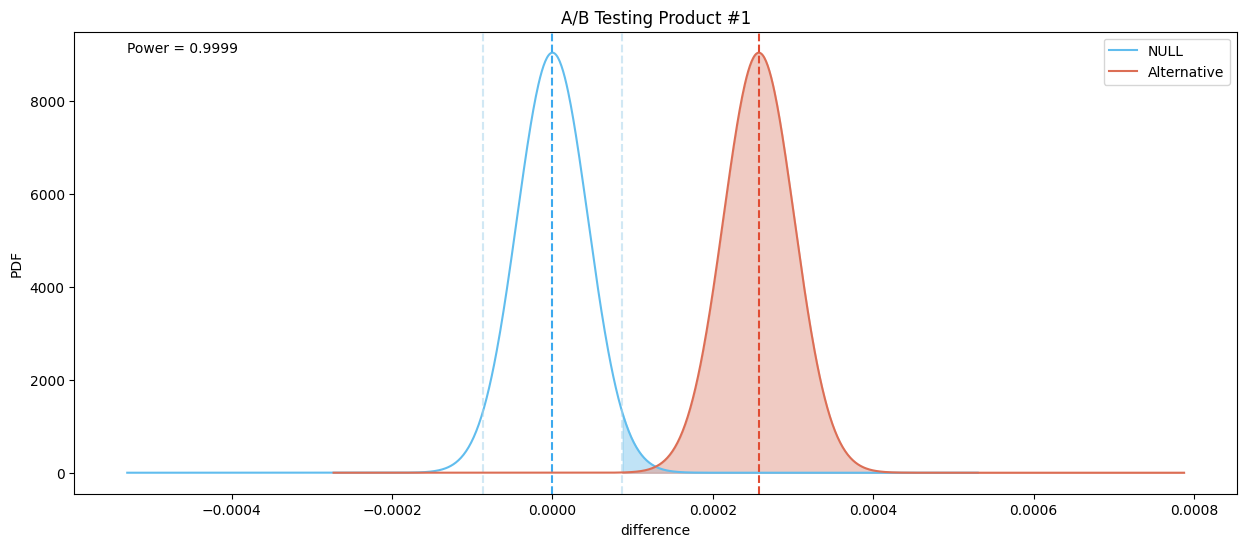

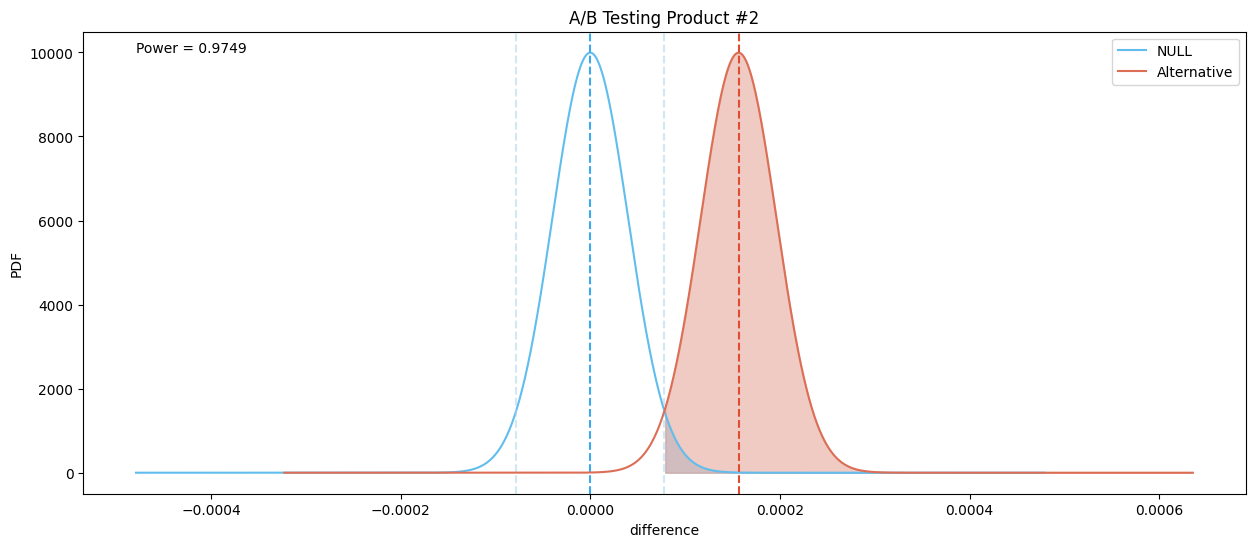

In [5]:
confidence = 0.95

products = sorted(set(df.index.get_level_values(0)))
for product in products:
    convert_ctrl = df.loc[(product, 'control'), 'success']
    convert_expr = df.loc[(product, 'test'), 'success']
    total_ctrl = df.loc[(product, 'control'), 'observation']
    total_expr = df.loc[(product, 'test'), 'observation']

    tester = SampleTester(convert_ctrl, convert_expr, total_ctrl, total_expr)

    z_score = norm.ppf((1 + confidence) / 2)
    margin = z_score * tester.stdev_null
    
    plot(tester, margin, name=f'A/B Testing Product #{product}')